# Draft Figures notebook for tagging analysis

Rich Fiorella
February 18, 2021

Figure outline:
1) Bucket model schematic (not a python figure)
2) comparison to gnip (not ready yet)
3) plots of ln(f): annual, DJF, and JJA
4) scatter plots of d'18O vs ln(f)
5) correlation maps of ln(f) and d'18O, as well as regression slopes
6) plots of Tcond: annual, DJF, and JJA
7) scatter plot d18O vs Tcond
8) correlation maps of d18O and Tcond
9) plots of Q/P vs RT (annual, DJF, JJA)
10) scatter and correlation between Q/P and RT
11) d18O vs ln(R) an ln(Q/P) - compare to Aggarwal fig 2.
12) d18O vs ln(R) and ln(Q/P) anomalies - compare to Aggarwal fig. 3
13) scatters of three factors affecting d-excess (ws, T, RH)
14) correlation maps of these factors vs d-excess
15) (optional) which factor is most important where? (this question might be worth breaking out to an additional MS focused on all isotopologues?)

### Next code block reads in the data, and does some initial preprocessing for the figures to follow.

In [1]:
# set up packages and data
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy

# set plotting resolution
dpi_out = 450 # lower res for drafts, higher res for final submission
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Verdana']})

# calculate d18O_0, need to filter for things above x mm/day
thres = 0.1 # mm/day 
thres_mps = thres*(1/86400)*(1/1000) # convert mm/day -> m/s

c6fann = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_free_ANN.nc", decode_timedelta = False)
c6fdjf = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_free_DJF.nc", decode_timedelta = False)
c6fjja = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_free_JJA.nc", decode_timedelta = False)

c6nann = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_ANN.nc", decode_timedelta = False)
c6ndjf = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_DJF.nc", decode_timedelta = False)
c6njja = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_JJA.nc", decode_timedelta = False)

# finally finally, get the iCAM5 data:
c5ann = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM5_free_ANN.nc", decode_timedelta = False, decode_times = False)
c5djf = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM5_free_DJF.nc", decode_timedelta = False, decode_times = False)
c5jja = xr.open_dataset("~/Dropbox/tagging_analysis/proc_data/iCAM5_free_JJA.nc", decode_timedelta = False, decode_times = False)

c5ann


<xarray.Dataset>
Dimensions:      (lat: 192, lon: 288)
Coordinates:
  * lat          (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon          (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    PRECT_H216O  (lat, lon) float64 ...
    PRECT_H218O  (lat, lon) float64 ...
    PRECT_H2O    (lat, lon) float64 ...
    PRECT_HDO    (lat, lon) float64 ...
    TREFHT       (lat, lon) float64 ...
    TS           (lat, lon) float64 ...
    PRECT_d18O   (lat, lon) float64 ...
    PRECT_d2H    (lat, lon) float64 ...
    PRECT_dxs    (lat, lon) float64 ...

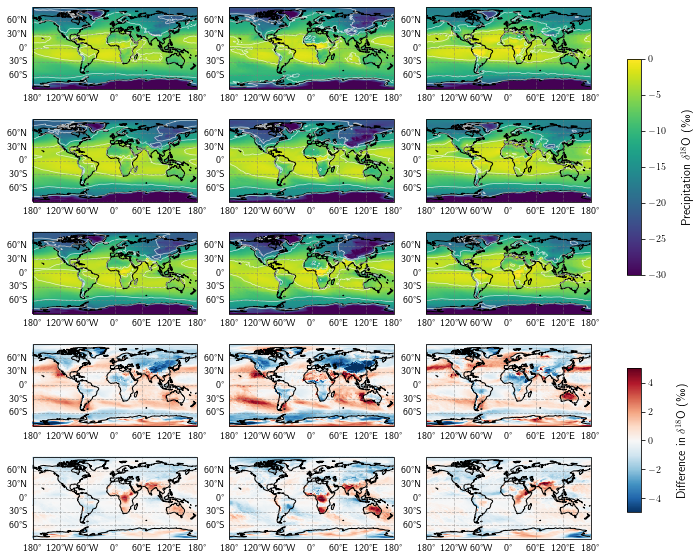

In [2]:
# Figure 2 - annual means

# now make the map plots:
fig = plt.figure(figsize=(10,10))

grid = gridspec.GridSpec(nrows = 5,
                        ncols = 3,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "viridis"
cmap2 = 'RdBu_r'

cmin = -30
cmax = 0

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[4], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid
ax7 = fig.add_subplot(grid[6], projection=proj) # upper cell of grid
ax8 = fig.add_subplot(grid[7], projection=proj) # middle cell of grid
ax9 = fig.add_subplot(grid[8], projection=proj) # lower cell of grid
ax10 = fig.add_subplot(grid[9], projection=proj) # upper cell of grid
ax11 = fig.add_subplot(grid[10], projection=proj) # middle cell of grid
ax12 = fig.add_subplot(grid[11], projection=proj) # lower cell of grid
ax13 = fig.add_subplot(grid[12], projection=proj) # upper cell of grid
ax14 = fig.add_subplot(grid[13], projection=proj) # middle cell of grid
ax15 = fig.add_subplot(grid[14], projection=proj) # lower cell of grid


#-----------------------------------------------
# First row: seasonal plots of iCAM5.

# left: annual mean, iCAM5
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5ann.PRECT_d18O.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                    add_colorbar = False)
c5ann.PRECT_d18O.plot.contour(ax=ax1, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

# middle: djf mean, iCAM5
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5djf.PRECT_d18O.plot(ax = ax2,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                    add_colorbar = False)
c5djf.PRECT_d18O.plot.contour(ax=ax2, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

# lower left: annual mean, iCAM5
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5jja.PRECT_d18O.plot(ax = ax3,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                    add_colorbar = False)
c5jja.PRECT_d18O.plot.contour(ax=ax3, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

#----------------------------------------------
# second row: free iCAM6

# left: annual mean, iCAM6
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fann.PRECT_d18O.plot(ax = ax4,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                     add_colorbar = False)
c6fann.PRECT_d18O.plot.contour(ax=ax4, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

# middle middle: DJF mean, iCAM6
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fdjf.PRECT_d18O.plot(ax = ax5,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                     add_colorbar = False)
c6fdjf.PRECT_d18O.plot.contour(ax=ax5, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

# bottom middle: JJA mean, iCAM6
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fjja.PRECT_d18O.plot(ax = ax6,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                     add_colorbar = False)
c6fjja.PRECT_d18O.plot.contour(ax=ax6, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

#--------------------------
# third row

# left: annual mean, iCAM6
ax7.coastlines(linewidth = 1)
gl = ax7.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6nann.PRECT_d18O.plot(ax = ax7,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                     add_colorbar = False)
c6nann.PRECT_d18O.plot.contour(ax=ax7, 
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)
                               #linestyles = ['--', '--', '--'])

# middle middle: DJF mean, iCAM6
ax8.coastlines()
gl = ax8.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6ndjf.PRECT_d18O.plot(ax = ax8,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                     add_colorbar = False)
c6ndjf.PRECT_d18O.plot.contour(ax=ax8,  
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

# bottom middle: JJA mean, iCAM6
ax9.coastlines()
gl = ax9.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = c6njja.PRECT_d18O.plot(ax = ax9,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                    vmin = cmin,
                    vmax = cmax,
                     add_colorbar = False)
c6njja.PRECT_d18O.plot.contour(ax=ax9,  
                               levels = [-20, -12, -4], 
                               colors = ['w','w','w'],
                               linewidths = [0.75, 0.75, 0.75],
                               alpha = 0.7)

#-------------------------------------------
# second row: difference between cam5 and 6, both free

cam_diff = c6fann.PRECT_d18O - c5ann.PRECT_d18O

# left: annual mean, iCAM6
ax10.coastlines()
gl = ax10.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = cam_diff.plot(ax = ax10,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = -5,
                     vmax = 5,
                     add_colorbar = False)

cam_diff = c6fdjf.PRECT_d18O - c5djf.PRECT_d18O

# middle: annual mean, iCAM6
ax11.coastlines()
gl = ax11.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax11,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = -5,
                     vmax = 5,
                     add_colorbar = False)

cam_diff = c6fjja.PRECT_d18O - c5jja.PRECT_d18O

# left: annual mean, iCAM6
ax12.coastlines()
gl = ax12.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax12,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = -5,
                     vmax = 5,
                     add_colorbar = False)

#---------------------------------------------------
# third row: difference between nudged and free cam6

cam_diff = c6nann.PRECT_d18O - c6fann.PRECT_d18O

# left: annual mean, iCAM6
ax13.coastlines()
gl = ax13.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax13,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = -5,
                     vmax = 5,
                     add_colorbar = False)

cam_diff = c6ndjf.PRECT_d18O - c6fdjf.PRECT_d18O

# middle: annual mean, iCAM6
ax14.coastlines()
gl = ax14.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax14,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = -5,
                     vmax = 5,
                     add_colorbar = False)

cam_diff = c6njja.PRECT_d18O - c6fjja.PRECT_d18O

# left: annual mean, iCAM6
ax15.coastlines()
gl = ax15.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax15,
              cmap = cmap2,
              transform = ccrs.PlateCarree(),
              vmin = -5,
              vmax = 5,
              add_colorbar = False)

# turn off plot titles
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')
ax9.set_title('')
ax10.set_title('')
ax11.set_title('')
ax12.set_title('')
ax13.set_title('')
ax14.set_title('')
ax15.set_title('')

fig.subplots_adjust(right = 0.90)#, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax=cb1_ax)
cbar1.set_label("Precipitation $\delta^{18}$O (‰)", size = 'large', labelpad = 15)

cb2_ax = fig.add_axes([0.95, 0.17, 0.02, 0.2])
cbar2 = fig.colorbar(im2, cax=cb2_ax)
cbar2.set_label("Difference in $\delta^{18}$O (‰)", size = 'large', labelpad = 15)

plt.draw()
plt.savefig('plots/fig02.png',dpi=dpi_out,bbox_inches='tight')

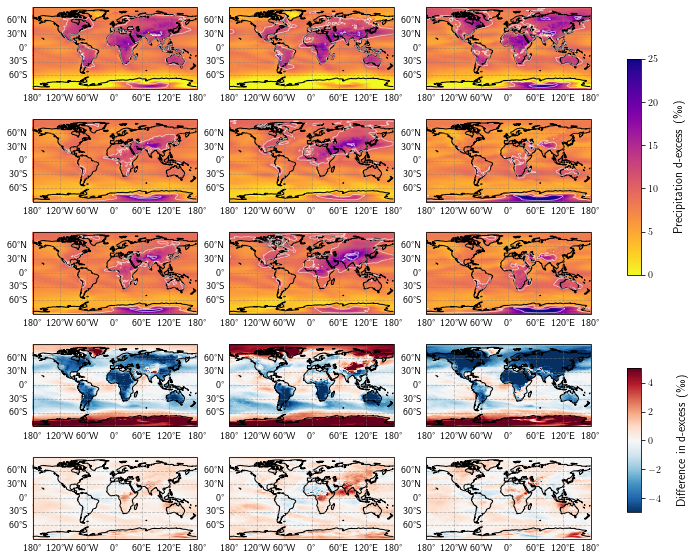

In [3]:
# Figure 2 - annual means

# now make the map plots:
fig = plt.figure(figsize=(10,10))

grid = gridspec.GridSpec(nrows = 5,
                        ncols = 3,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "plasma_r"
c1min = 0
c1max = 25
cmap2 = 'RdBu_r'
c2min = -5
c2max = 5

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid
ax4 = fig.add_subplot(grid[3], projection=proj) # upper cell of grid
ax5 = fig.add_subplot(grid[4], projection=proj) # middle cell of grid
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of grid
ax7 = fig.add_subplot(grid[6], projection=proj) # upper cell of grid
ax8 = fig.add_subplot(grid[7], projection=proj) # middle cell of grid
ax9 = fig.add_subplot(grid[8], projection=proj) # lower cell of grid
ax10 = fig.add_subplot(grid[9], projection=proj) # upper cell of grid
ax11 = fig.add_subplot(grid[10], projection=proj) # middle cell of grid
ax12 = fig.add_subplot(grid[11], projection=proj) # lower cell of grid
ax13 = fig.add_subplot(grid[12], projection=proj) # upper cell of grid
ax14 = fig.add_subplot(grid[13], projection=proj) # middle cell of grid
ax15 = fig.add_subplot(grid[14], projection=proj) # lower cell of grid

#-----------------------------------------------
# First row: seasonal plots of iCAM5.

# left: annual mean, iCAM5
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5ann.PRECT_dxs.plot(ax = ax1,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = c1min,
                    vmax = c1max,
                    add_colorbar = False)
c5ann.PRECT_dxs.plot.contour(ax=ax1, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

# middle: djf mean, iCAM5
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5djf.PRECT_dxs.plot(ax = ax2,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = c1min,
                    vmax = c1max,
                    add_colorbar = False)
c5djf.PRECT_dxs.plot.contour(ax=ax2, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

# lower left: annual mean, iCAM5
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c5jja.PRECT_dxs.plot(ax = ax3,
                    cmap = cmap,
                    transform = ccrs.PlateCarree(),
                    vmin = c1min,
                    vmax = c1max,
                    add_colorbar = False)
c5jja.PRECT_dxs.plot.contour(ax=ax3, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

#----------------------------------------------
# second row: free iCAM6

# left: annual mean, iCAM6
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fann.PRECT_dxs.plot(ax = ax4,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = c1min,
                     vmax = c1max,
                     add_colorbar = False)
c6fann.PRECT_dxs.plot.contour(ax=ax4, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

# middle middle: DJF mean, iCAM6
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fdjf.PRECT_dxs.plot(ax = ax5,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = c1min,
                     vmax = c1max,
                     add_colorbar = False)
c6fdjf.PRECT_dxs.plot.contour(ax=ax5, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

# bottom middle: JJA mean, iCAM6
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6fjja.PRECT_dxs.plot(ax = ax6,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = c1min,
                     vmax = c1max,
                     add_colorbar = False)
c6fjja.PRECT_dxs.plot.contour(ax=ax6, 
                               levels = [10, 20],  
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)


#----------------------------------------------
# first row: nudged iCAM6

# left: annual mean, iCAM6
ax7.coastlines()
gl = ax7.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6nann.PRECT_dxs.plot(ax = ax7,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = c1min,
                     vmax = c1max,
                     add_colorbar = False)
c6nann.PRECT_dxs.plot.contour(ax=ax7, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

# middle middle: DJF mean, iCAM6
ax8.coastlines()
gl = ax8.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
c6ndjf.PRECT_dxs.plot(ax = ax8,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = c1min,
                     vmax = c1max,
                     add_colorbar = False)
c6ndjf.PRECT_dxs.plot.contour(ax=ax8, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

# bottom middle: JJA mean, iCAM6
ax9.coastlines()
gl = ax9.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = c6njja.PRECT_dxs.plot(ax = ax9,
                     cmap = cmap,
                     transform = ccrs.PlateCarree(),
                     vmin = c1min,
                     vmax = c1max,
                     add_colorbar = False)
c6njja.PRECT_dxs.plot.contour(ax=ax9, 
                               levels = [10, 20], 
                               colors = ['w','w'],
                               linewidths = [0.75, 0.75],
                               alpha = 0.7)

#-------------------------------------------
# second row: difference between cam5 and 6, both free

cam_diff = c6fann.PRECT_dxs - c5ann.PRECT_dxs

# left: annual mean, iCAM6
ax10.coastlines()
gl = ax10.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = cam_diff.plot(ax = ax10,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = c2min,
                     vmax = c2max,
                     add_colorbar = False)

cam_diff = c6fdjf.PRECT_dxs - c5djf.PRECT_dxs

# middle: annual mean, iCAM6
ax11.coastlines()
gl = ax11.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax11,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = c2min,
                     vmax = c2max,
                     add_colorbar = False)

cam_diff = c6fjja.PRECT_dxs - c5jja.PRECT_dxs

# left: annual mean, iCAM6
ax12.coastlines()
gl = ax12.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax12,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = c2min,
                     vmax = c2max,
                     add_colorbar = False)

#---------------------------------------------------
# third row: difference between nudged and free cam6

cam_diff = c6nann.PRECT_dxs - c6fann.PRECT_dxs

# left: annual mean, iCAM6
ax13.coastlines()
gl = ax13.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax13,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = c2min,
                     vmax = c2max,
                     add_colorbar = False)

cam_diff = c6ndjf.PRECT_dxs - c6fdjf.PRECT_dxs

# middle: annual mean, iCAM6
ax14.coastlines()
gl = ax14.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax14,
                     cmap = cmap2,
                     transform = ccrs.PlateCarree(),
                     vmin = c2min,
                     vmax = c2max,
                     add_colorbar = False)

cam_diff = c6njja.PRECT_dxs - c6fjja.PRECT_dxs

# left: annual mean, iCAM6
ax15.coastlines()
gl = ax15.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cam_diff.plot(ax = ax15,
              cmap = cmap2,
              transform = ccrs.PlateCarree(),
                     vmin = c2min,
                     vmax = c2max,
              add_colorbar = False)

# turn off plot titles
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')
ax7.set_title('')
ax8.set_title('')
ax9.set_title('')
ax10.set_title('')
ax11.set_title('')
ax12.set_title('')
ax13.set_title('')
ax14.set_title('')
ax15.set_title('')

fig.subplots_adjust(right = 0.90)#, wspace=0.18, hspace=0.02)
cb1_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax=cb1_ax)
cbar1.set_label("Precipitation d-excess (‰)", size = 'large', labelpad = 15)

cb2_ax = fig.add_axes([0.95, 0.17, 0.02, 0.2])
cbar2 = fig.colorbar(im2, cax=cb2_ax)
cbar2.set_label("Difference in d-excess (‰)", size = 'large', labelpad = 15)

plt.draw()
plt.savefig('plots/fig03.png',dpi=dpi_out,bbox_inches='tight')

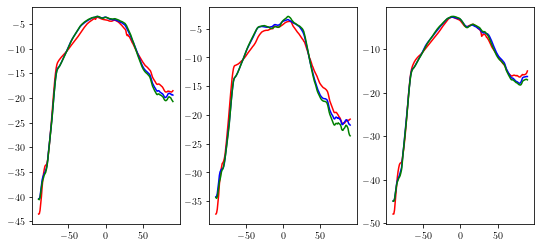

In [4]:
# plot zonal means.

zon_avg = xr.Dataset(
    data_vars={'c5ann': (('lat'), c5ann.PRECT_d18O.where(c5ann.PRECT_d18O > -50, -50).mean(dim=('lon'))),
               'c6fann': (('lat'), c6fann.PRECT_d18O.mean(dim=('lon'))),
               'c6nann': (('lat'), c6nann.PRECT_d18O.mean(dim=('lon'))),
               'c5djf': (('lat'), c5djf.PRECT_d18O.where(c5djf.PRECT_d18O > -50, -50).mean(dim=('lon'))),
               'c6fdjf': (('lat'), c6fdjf.PRECT_d18O.mean(dim=('lon'))),
               'c6ndjf': (('lat'), c6ndjf.PRECT_d18O.mean(dim=('lon'))),
               'c5jja': (('lat'), c5jja.PRECT_d18O.where(c5jja.PRECT_d18O > -50, -50).mean(dim=('lon'))),
               'c6fjja': (('lat'), c6fjja.PRECT_d18O.mean(dim=('lon'))),
               'c6njja': (('lat'), c6njja.PRECT_d18O.mean(dim=('lon'))),
              },
    coords = {'lat': c5ann.lat}
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(9,4))

ax1.plot('lat', 'c5ann', data = zon_avg, color = 'red')
ax1.plot('lat', 'c6fann', data = zon_avg, color = 'blue')
ax1.plot('lat', 'c6nann', data = zon_avg, color = 'green')

ax2.plot('lat', 'c5djf', data = zon_avg, color = 'red')
ax2.plot('lat', 'c6fdjf', data = zon_avg, color = 'blue')
ax2.plot('lat', 'c6ndjf', data = zon_avg, color = 'green')

ax3.plot('lat', 'c5jja', data = zon_avg, color = 'red')
ax3.plot('lat', 'c6fjja', data = zon_avg, color = 'blue')
ax3.plot('lat', 'c6njja', data = zon_avg, color = 'green')

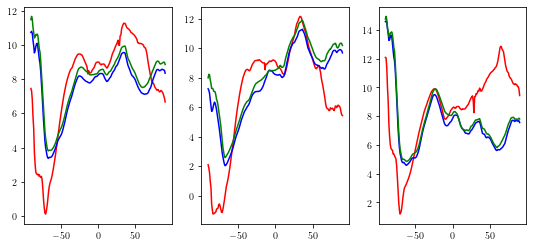

In [5]:
zon_avg = xr.Dataset(
    data_vars={'c5ann': (('lat'), c5ann.PRECT_dxs.where(c5ann.PRECT_dxs > -50, -50).where(c5ann.PRECT_dxs < 50, 50).mean(dim=('lon'))),
               'c6fann': (('lat'), c6fann.PRECT_dxs.mean(dim=('lon'))),
               'c6nann': (('lat'), c6nann.PRECT_dxs.mean(dim=('lon'))),
               'c5djf': (('lat'), c5djf.PRECT_dxs.where(c5djf.PRECT_dxs > -50, -50).where(c5djf.PRECT_dxs < 50, 50).mean(dim=('lon'))),
               'c6fdjf': (('lat'), c6fdjf.PRECT_dxs.mean(dim=('lon'))),
               'c6ndjf': (('lat'), c6ndjf.PRECT_dxs.mean(dim=('lon'))),
               'c5jja': (('lat'), c5jja.PRECT_dxs.where(c5jja.PRECT_dxs > -50, -50).where(c5jja.PRECT_dxs < 50, 50).mean(dim=('lon'))),
               'c6fjja': (('lat'), c6fjja.PRECT_dxs.mean(dim=('lon'))),
               'c6njja': (('lat'), c6njja.PRECT_dxs.mean(dim=('lon'))),
              },
    coords = {'lat': c5ann.lat}
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(9,4))

ax1.plot('lat', 'c5ann', data = zon_avg, color = 'red')
ax1.plot('lat', 'c6fann', data = zon_avg, color = 'blue')
ax1.plot('lat', 'c6nann', data = zon_avg, color = 'green')

ax2.plot('lat', 'c5djf', data = zon_avg, color = 'red')
ax2.plot('lat', 'c6fdjf', data = zon_avg, color = 'blue')
ax2.plot('lat', 'c6ndjf', data = zon_avg, color = 'green')

ax3.plot('lat', 'c5jja', data = zon_avg, color = 'red')
ax3.plot('lat', 'c6fjja', data = zon_avg, color = 'blue')
ax3.plot('lat', 'c6njja', data = zon_avg, color = 'green')

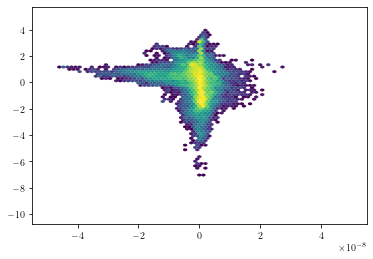

In [6]:
# scatter plot - are the anomalies between p and d18O between iCAM5 and 6 correlated?
d18O_diff = c6fann.PRECT_d18O - c5ann.PRECT_d18O
p_diff    = c6fann.PRECT - c5ann.PRECT_H2O

# Figure 4: scatter plots of ln(d18O+1) vs ln(f)
fig, ax = plt.subplots()

# uncorrected d18
hb = ax.hexbin(p_diff, d18O_diff,
                mincnt = 5,
               extent = (-5e-8,5e-8,-10,5),
                gridsize = 75, norm=mpl.colors.LogNorm(5,500), linewidths = 0.1)
# add x and y axis labels
#ax1.set_xlabel('ln(f)')
#ax1.set_ylabel(r'ln($\delta^{18}$O+1)')
